In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from adjustText import adjust_text

In [3]:
headers= {
    'Host': 'stats.nba.com', 
    'Connection': 'keep-alive', 
    'Accept': 'application/json, text/plain, */*', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36', 
    'Referer': 'https://stats.nba.com/', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'en-US,en;q=0.9',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true',
}

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
from nba_api.stats.endpoints.leaguedashptdefend import LeagueDashPtDefend

In [6]:
defend = LeagueDashPtDefend(per_mode_simple='PerGame', headers=headers)

In [7]:
defend_df = defend.get_data_frames()[0]

In [8]:
defend_df = defend_df.loc[defend_df.GP > 20]

In [9]:
sorted_top = defend_df.loc[defend_df.D_FGA > 10]
sorted_top = sorted_top.sort_values(by='D_FG_PCT')

7

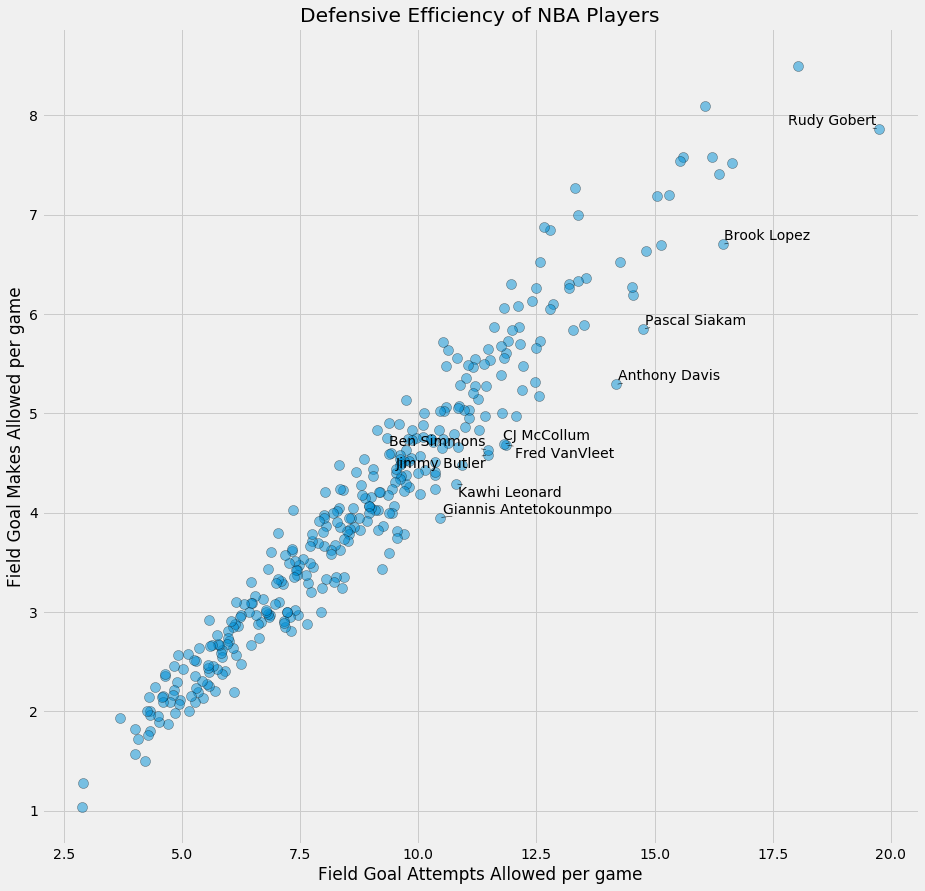

In [10]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(defend_df.D_FGA, defend_df.D_FGM, s=100, alpha=0.5, edgecolors='black')
texts = []

for index in range(10):
    item = sorted_top.iloc[index]
    texts.append(ax.text(x=item.D_FGA, y=item.D_FGM, s=item.PLAYER_NAME))
    
ax.set_xlabel("Field Goal Attempts Allowed per game")
ax.set_ylabel("Field Goal Makes Allowed per game")
ax.set_title("Defensive Efficiency of NBA Players")
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'))

# Rudy the restricted/mid range defender

In [11]:
lt_df = LeagueDashPtDefend(per_mode_simple='PerGame', headers=headers, defense_category="Less Than 10Ft")

In [12]:
two_point_df = LeagueDashPtDefend(per_mode_simple='PerGame', headers=headers, defense_category="2 Pointers")

In [13]:
two_point_df = two_point_df.get_data_frames()[0]
lt_df = lt_df.get_data_frames()[0]

In [14]:
filtered = two_point_df.loc[two_point_df.GP > 20]
filtered_lt = lt_df.loc[lt_df.GP > 20]

In [15]:
sorted_mid_res = filtered.loc[filtered.FG2A > 6]
sorted_mid_res = sorted_mid_res.sort_values(by='FG2_PCT')

In [16]:
sorted_lt = filtered_lt.loc[filtered_lt.FGA_LT_10 > 6]
sorted_lt = sorted_lt.sort_values(by='LT_10_PCT')  # LT_10_PCT

6

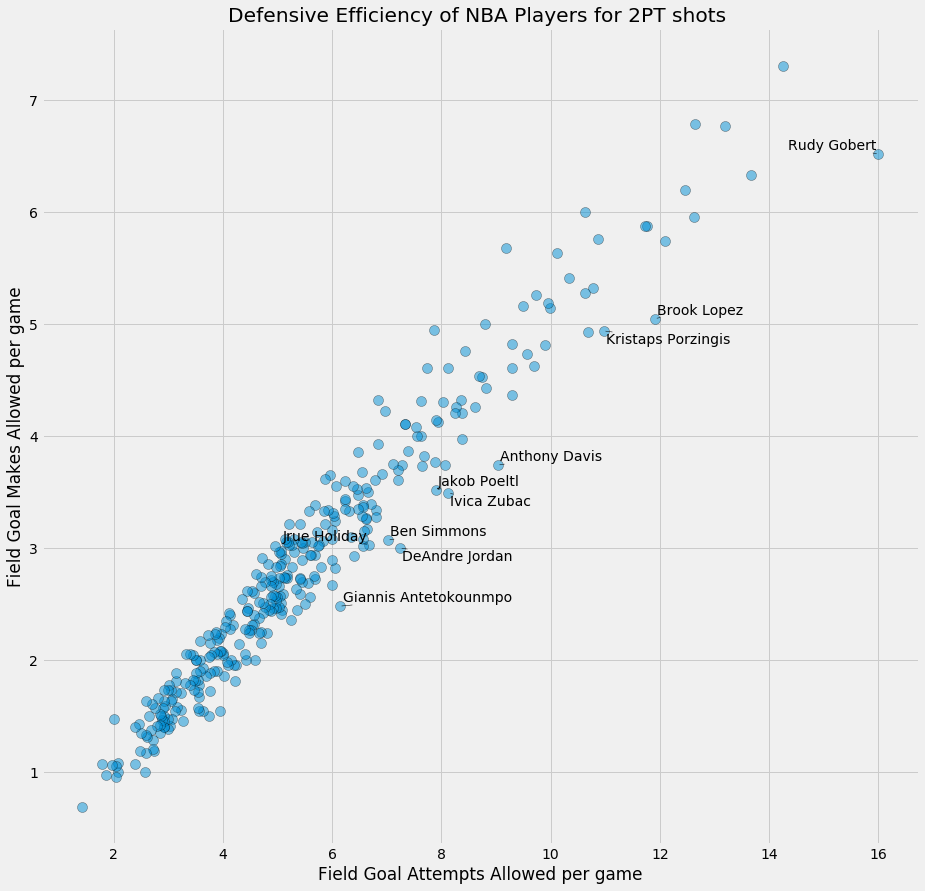

In [17]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(filtered.FG2A, filtered.FG2M, s=100, alpha=0.5, edgecolors='black')
texts = []

for index in range(10):
    item = sorted_mid_res.iloc[index]
    texts.append(ax.text(x=item.FG2A, y=item.FG2M, s=item.PLAYER_NAME))
    
ax.set_xlabel("Field Goal Attempts Allowed per game")
ax.set_ylabel("Field Goal Makes Allowed per game")
ax.set_title("Defensive Efficiency of NBA Players for 2PT shots ")
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'))

6

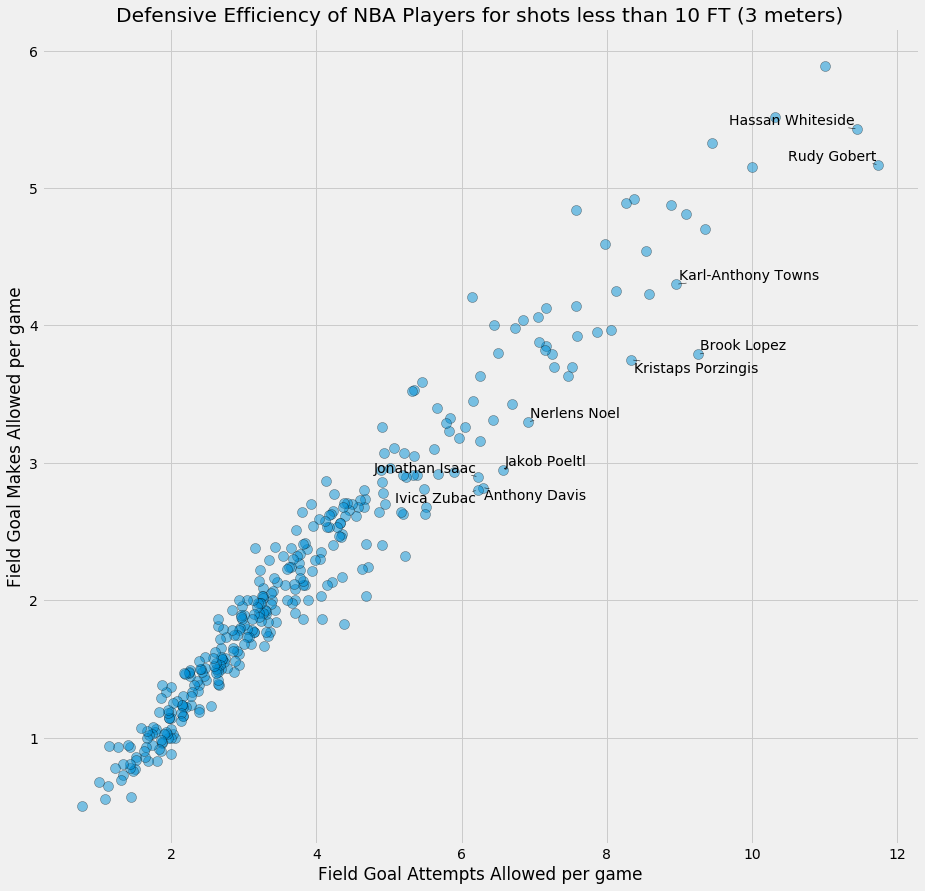

In [18]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(filtered_lt.FGA_LT_10, filtered_lt.FGM_LT_10, s=100, alpha=0.5, edgecolors='black')
texts = []

for index in range(10):
    item = sorted_lt.iloc[index]
    texts.append(ax.text(x=item.FGA_LT_10, y=item.FGM_LT_10, s=item.PLAYER_NAME))
    
ax.set_xlabel("Field Goal Attempts Allowed per game")
ax.set_ylabel("Field Goal Makes Allowed per game")
ax.set_title("Defensive Efficiency of NBA Players for shots less than 10 FT (3 meters)")
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'))

Utah malo trica primaju, usmjeravaju sve na reket. 

Provjerit kako stoje kad je Gobert na terenu vs kad ni.

# Utah team analysis

In [19]:
three_pointers = LeagueDashPtDefend(per_mode_simple='PerGame', headers=headers, defense_category="3 Pointers")
two_pointers = LeagueDashPtDefend(per_mode_simple='PerGame', headers=headers, defense_category="2 Pointers")

In [20]:
three_df = three_pointers.get_data_frames()[0]
two_df = two_pointers.get_data_frames()[0]

In [21]:
merged = pd.merge(left=three_df, right=two_df, suffixes=('_three', '_two'), on="CLOSE_DEF_PERSON_ID")

In [22]:
utah_df = merged.loc[merged.PLAYER_LAST_TEAM_ID_two == 1610612762]

In [23]:
utah_df = utah_df.loc[utah_df.CLOSE_DEF_PERSON_ID != 203903] # remove clarkson

In [24]:
utah_df = utah_df.loc[utah_df.GP_two > 20]  # remove out of rotation players

Text(0.5, 1, "Defensive efficiency of Utah Jazz' players")

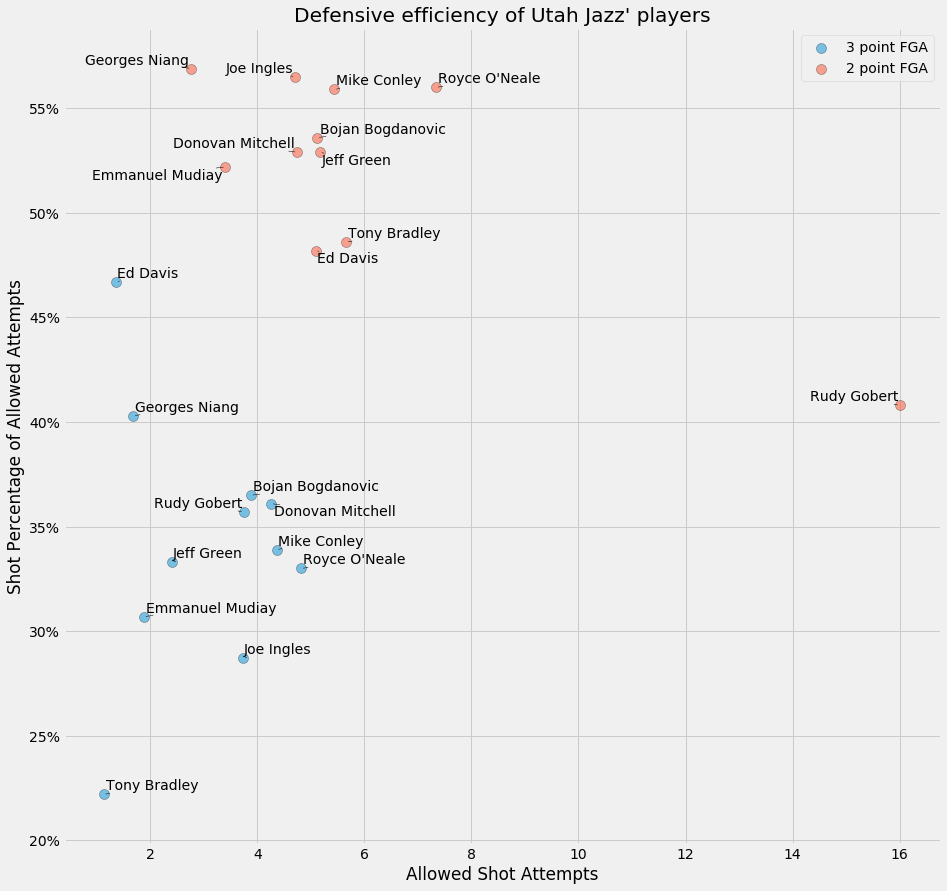

In [235]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(utah_df.FG3A, utah_df.FG3_PCT, s=100, alpha=0.5, edgecolors='black', label='3 point FGA')
ax.scatter(utah_df.FG2A, utah_df.FG2_PCT, s=100, alpha=0.5, edgecolors='black', label='2 point FGA')
texts = []

for index in range(len(utah_df)):
    item = utah_df.iloc[index]
    texts.append(ax.text(x=item.FG3A, y=item.FG3_PCT, s=item.PLAYER_NAME_two))
    texts.append(ax.text(x=item.FG2A, y=item.FG2_PCT, s=item.PLAYER_NAME_two))
    
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'))
ax.legend()
ax.set_xlabel("Allowed Shot Attempts")
ax.set_ylabel("Shot Percentage of Allowed Attempts")
labels = ax.set_yticklabels([f"{int(float(label.get_text()) * 100)}%" for label in ax.get_yticklabels()])
ax.set_title("Defensive efficiency of Utah Jazz' players")

# Team defense

In [237]:
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [238]:
team = LeagueDashTeamStats(per_mode_detailed='PerGame', headers=headers, measure_type_detailed_defense='Opponent')

In [239]:
team_df = team.get_data_frames()[0]

In [240]:
team_df.loc[:, "OPP_FG2A"] = team_df.OPP_FGA - team_df.OPP_FG3A

In [241]:
utah_data = team_df.loc[team_df.TEAM_ID == 1610612762]

In [242]:
non_utah_data = team_df.loc[team_df.TEAM_ID != 1610612762]

8

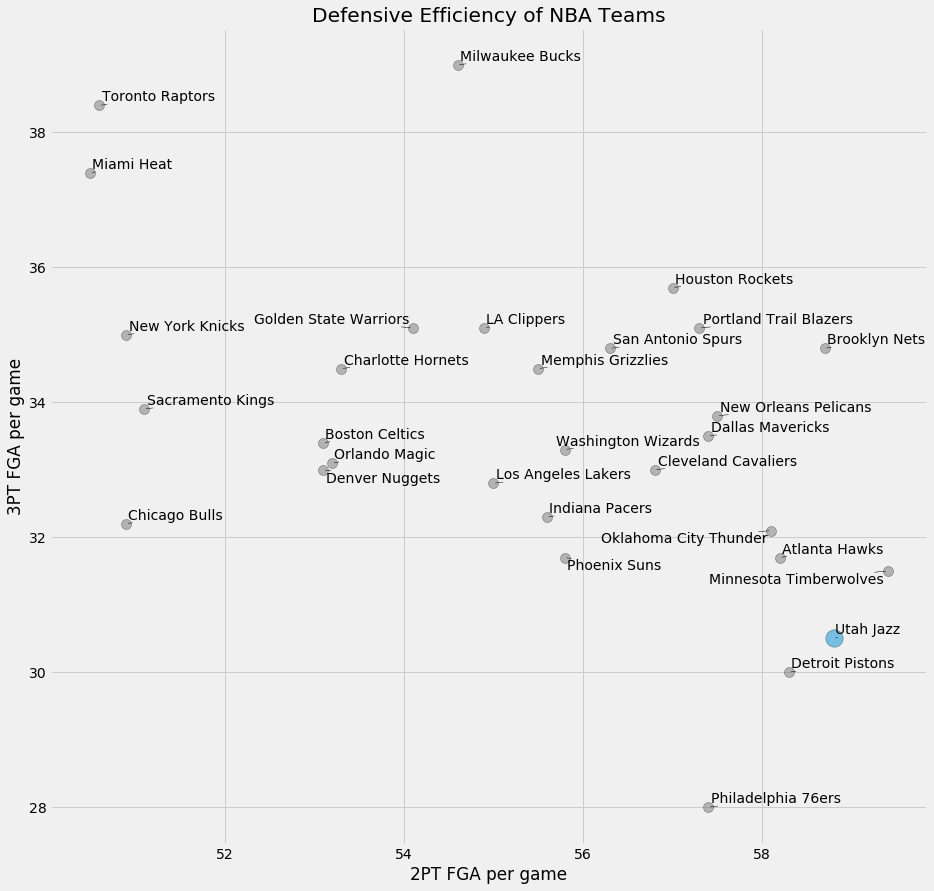

In [243]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(utah_data.OPP_FG2A, utah_data.OPP_FG3A, s=300, alpha=0.5, edgecolors='black')
ax.scatter(non_utah_data.OPP_FG2A, non_utah_data.OPP_FG3A, s=100, alpha=0.5, edgecolors='black', color='#787878')

texts = []

for index in range(len(team_df)):
    item = team_df.iloc[index]
    texts.append(ax.text(x=item.OPP_FG2A, y=item.OPP_FG3A, s=item.TEAM_NAME))
    
ax.set_xlabel("2PT FGA per game")
ax.set_ylabel("3PT FGA per game")
ax.set_title("Defensive Efficiency of NBA Teams")
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'))

Third most 2 point field goal attempts and third least least three point field goal attempts.

TODO: Take a look at pick and roll ball handler

TODO: Take a look at how top centers perform vs Gobert and other teams/centers

TODO: Take a look at how utah fares when gobert has a lot or little DFGA

Utahovi igrači uvijek idu iznad blokova

In [7]:
from nba_api.stats.endpoints.boxscoredefensive import BoxScoreDefensive
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
import requests
import time

In [8]:
gobert_id = find_players_by_full_name("Rudy Gobert")[0]['id']

In [9]:
json_data = requests.get('https://stats.nba.com/stats/playergamelogs?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlayerID=203497&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&VsConference=&VsDivision=', headers=headers).json()

In [10]:
columns = json_data['resultSets'][0]['headers']

In [11]:
data = json_data['resultSets'][0]['rowSet']

In [12]:
gobert_adv_df = pd.DataFrame(data=data, columns=columns)

In [13]:
game_finder = LeagueGameFinder(player_or_team_abbreviation='P', player_id_nullable=gobert_id, headers=headers)

In [14]:
gobert_df = game_finder.get_data_frames()[0]

In [15]:
gobert_df = gobert_df.loc[gobert_df.SEASON_ID == "22019"]

In [16]:
gobert_bs_df = None

for index in range(len(gobert_df)):
    print(f"{index+1}. game")
    item = gobert_df.iloc[index]
    game_id = item.GAME_ID
    box_score_df = BoxScoreDefensive(game_id=game_id, headers=headers).get_data_frames()[0]
    gob_game = box_score_df.loc[box_score_df.PLAYER_ID == 203497]
    if gobert_bs_df is None:
        gobert_bs_df = gob_game
    else:
        gobert_bs_df = pd.concat([gobert_bs_df, gob_game], ignore_index=True)
    time.sleep(1)

1. game
2. game
3. game
4. game
5. game
6. game
7. game
8. game
9. game
10. game
11. game
12. game
13. game
14. game
15. game
16. game
17. game
18. game
19. game
20. game
21. game
22. game
23. game
24. game
25. game
26. game
27. game
28. game
29. game
30. game
31. game
32. game
33. game
34. game
35. game
36. game
37. game
38. game
39. game
40. game
41. game
42. game
43. game


In [19]:
gobert_bs_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,TEAM_NICKNAME,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MATCHUP_MIN,...,MATCHUP_AST,MATCHUP_TOV,STL,BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT
0,0021900665,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,9:32,...,3,1,1,3,7,18,0.389,1,4,0.250
1,0021900651,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,10:57,...,1,1,0,1,11,32,0.344,1,9,0.111
2,0021900636,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,11:02,...,1,3,2,3,9,21,0.429,1,3,0.333
3,0021900616,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,13:50,...,5,2,0,3,11,21,0.524,1,3,0.333
4,0021900599,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,11:28,...,1,3,1,2,15,31,0.484,2,4,0.500
5,0021900585,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,13:43,...,6,1,1,2,15,33,0.455,2,5,0.400
6,0021900574,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,10:21,...,4,2,1,5,2,14,0.143,0,3,0.000
7,0021900561,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,9:20,...,2,5,1,1,8,21,0.381,0,0,0.000
8,0021900544,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,10:53,...,8,2,0,0,10,22,0.455,0,1,0.000
9,0021900525,1610612762,UTA,Utah,Jazz,203497,Rudy Gobert,C,,9:51,...,3,3,1,0,10,22,0.455,2,7,0.286


In [84]:
joined_data = pd.merge(left=gobert_df, right=gobert_bs_df, on="GAME_ID", suffixes=('_box_score', '_defense'))

In [94]:
colors = []
for result in joined_data.WL:
    colors.append("lightskyblue" if result == "W" else "indianred")

In [98]:
wins = joined_data.loc[joined_data.WL == "W"]
losses = joined_data.loc[joined_data.WL == "L"]

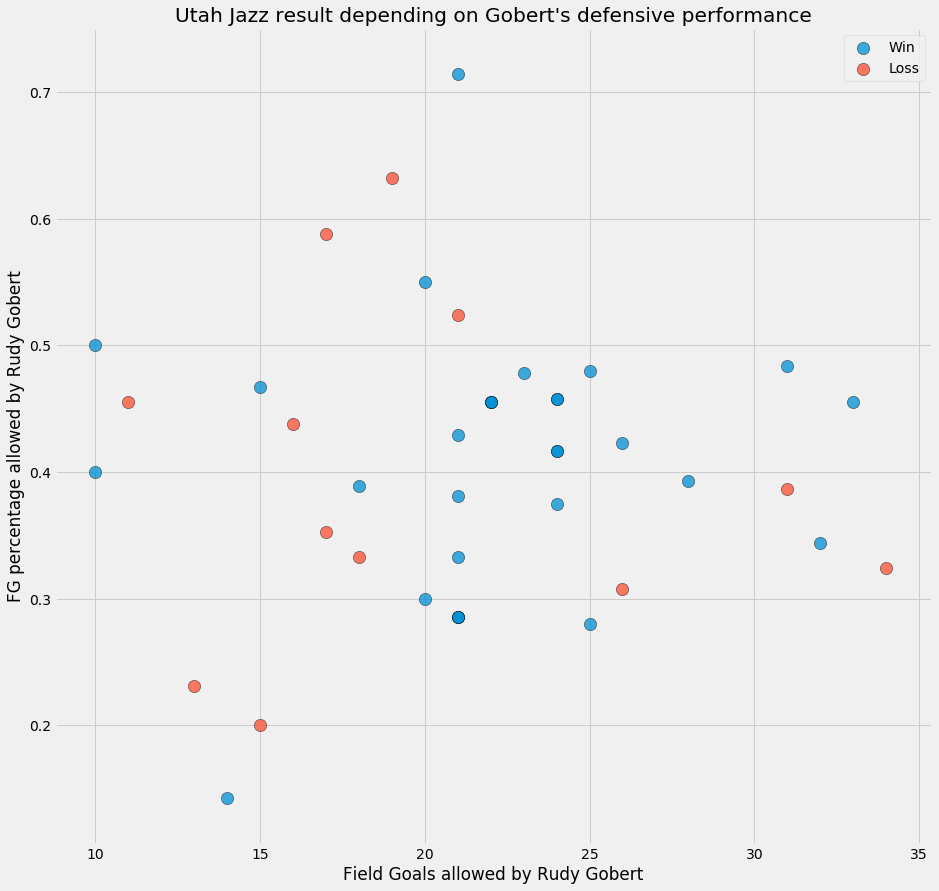

In [99]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(wins.MATCHUP_FGA, wins.MATCHUP_FG_PCT, s=150, alpha=0.75, edgecolors='black', label="Win")
ax.scatter(losses.MATCHUP_FGA, losses.MATCHUP_FG_PCT, s=150, alpha=0.75, edgecolors='black', label="Loss")
    
ax.set_xlabel("Field Goals allowed by Rudy Gobert")
ax.set_ylabel("FG percentage allowed by Rudy Gobert")
ax.set_title("Utah Jazz result depending on Gobert's defensive performance")
ax.legend()

In [136]:
joined_adv = pd.merge(left=gobert_adv_df, right=gobert_bs_df, on="GAME_ID", suffixes=('_adv', '_defense'))

In [142]:
wins = joined_adv.loc[joined_data.WL == "W"]
losses = joined_adv.loc[joined_data.WL == "L"]

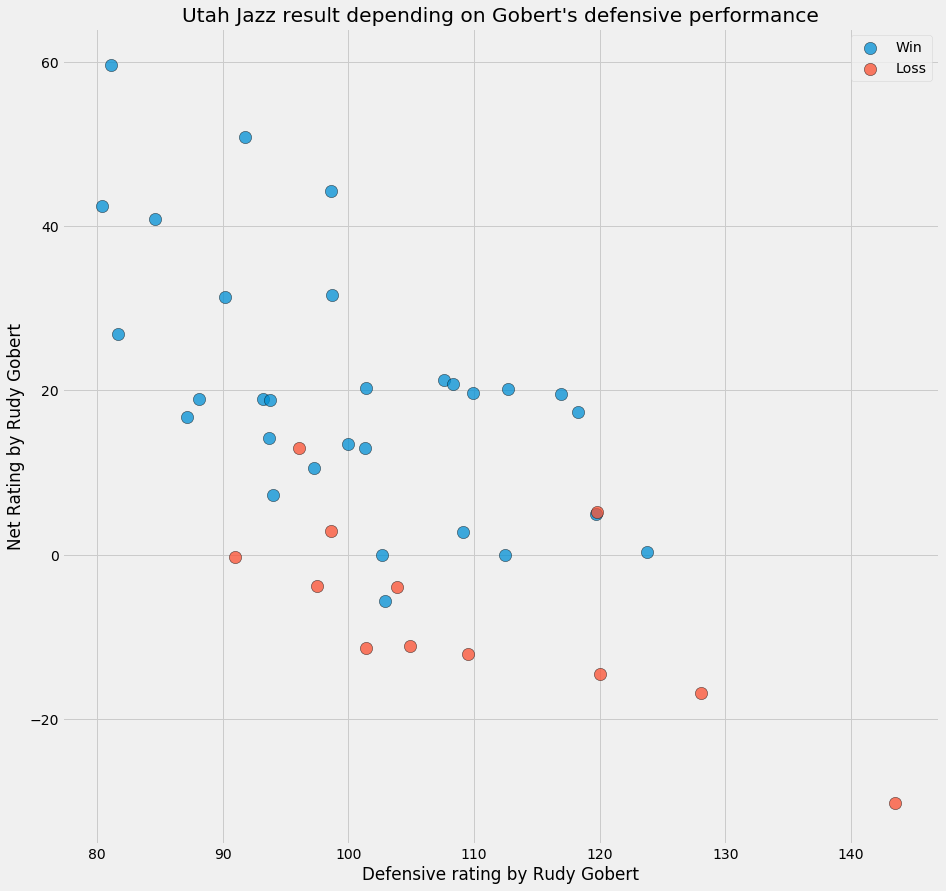

In [145]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(wins.DEF_RATING, wins.NET_RATING, s=150, alpha=0.75, edgecolors='black', label="Win")
ax.scatter(losses.DEF_RATING, losses.NET_RATING, s=150, alpha=0.75, edgecolors='black', label="Loss")
    
ax.set_xlabel("Defensive rating by Rudy Gobert")
ax.set_ylabel("Net Rating by Rudy Gobert")
ax.set_title("Utah Jazz result depending on Gobert's defensive performance")
ax.legend()

# Utah Defense Breakdown

Defenders which are close or away of defender

In [146]:
from nba_api.stats.endpoints.leaguedashteamptshot import LeagueDashTeamPtShot

In [152]:
from nba_api.stats.static.teams import get_teams

In [177]:
options = {
    '0-2 Feet - Very Tight': 'VERY_TIGHT',
    '2-4 Feet - Tight': 'TIGHT',
    '4-6 Feet - Open': 'OPEN',
    '6+ Feet - Wide Open': 'WIDE_OPEN'
}

In [149]:
utah_def = LeagueDashTeamPtShot(close_def_dist_range_nullable='0-2 Feet - Very Tight', per_mode_simple="PerGame", opponent_team_id_nullable="1610612762", headers=headers, )

In [154]:
df = utah_def.get_data_frames()[0]

In [162]:
filtered = df.mean().loc[['FGM', 'FGA', 'FG_PCT', 'FG2M', 'FG2A', 'FG2_PCT', 'FG3M', 'FG3A', 'FG3_PCT']]

In [164]:
filtered.loc['TEAM_NAME'] = 'Utah Jazz'

In [185]:
total_team_df = []
for team in get_teams():
    team_id = team['id']
    full_name = team['full_name']
    for option in options:
        team_df = LeagueDashTeamPtShot(close_def_dist_range_nullable=option, per_mode_simple="PerGame", opponent_team_id_nullable=team_id, headers=headers)
        team_df = team_df.get_data_frames()[0]
        filtered_df = team_df.mean().loc[['FGM', 'FGA', 'FG_PCT', 'FG2M', 'FG2A', 'FG2_PCT', 'FG3M', 'FG3A', 'FG3_PCT']]
        filtered_df.loc['TEAM_NAME'] = full_name
        filtered_df.loc['TEAM_ID'] = team_id
        filtered_df.loc['CLOSE_DEF'] = options[option]
        total_team_df.append(filtered_df)
        time.sleep(1)
    print(f"Done with team {full_name}")

Done with team Atlanta Hawks
Done with team Boston Celtics
Done with team Cleveland Cavaliers
Done with team New Orleans Pelicans
Done with team Chicago Bulls
Done with team Dallas Mavericks
Done with team Denver Nuggets
Done with team Golden State Warriors
Done with team Houston Rockets
Done with team Los Angeles Clippers
Done with team Los Angeles Lakers
Done with team Miami Heat
Done with team Milwaukee Bucks
Done with team Minnesota Timberwolves
Done with team Brooklyn Nets
Done with team New York Knicks
Done with team Orlando Magic
Done with team Indiana Pacers
Done with team Philadelphia 76ers
Done with team Phoenix Suns
Done with team Portland Trail Blazers
Done with team Sacramento Kings
Done with team San Antonio Spurs
Done with team Oklahoma City Thunder
Done with team Toronto Raptors
Done with team Utah Jazz
Done with team Memphis Grizzlies
Done with team Washington Wizards
Done with team Detroit Pistons
Done with team Charlotte Hornets


In [186]:
all_team_df = pd.concat(total_team_df, axis=1).transpose()

In [188]:
very_close_defence = all_team_df.loc[all_team_df.CLOSE_DEF == 'VERY_TIGHT']

10

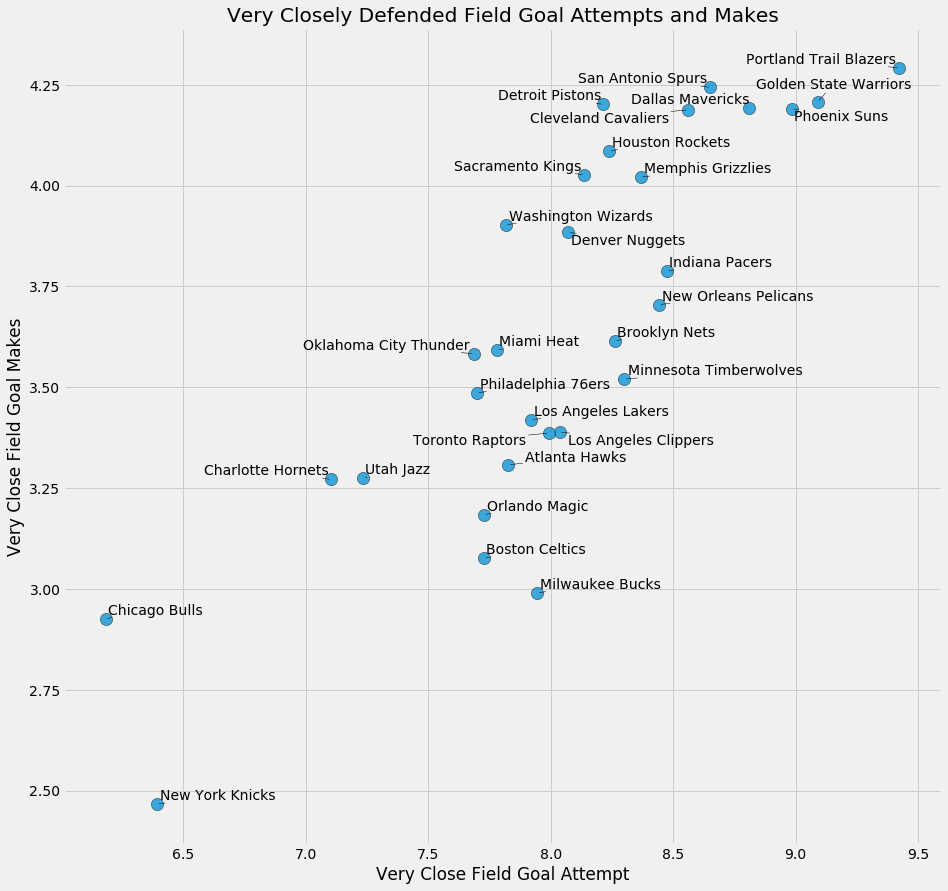

In [193]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(very_close_defence.FGA, very_close_defence.FGM, s=150, alpha=0.75, edgecolors='black', label="2PT FG")
#ax.scatter(very_close_defence.FG3A, very_close_defence.FG3M, s=150, alpha=0.75, edgecolors='black', label="3PT FG")
    
ax.set_ylabel("Very Close Field Goal Makes")
ax.set_xlabel("Very Close Field Goal Attempt")
ax.set_title("Very Closely Defended Field Goal Attempts and Makes")
#ax.legend()

texts = []
for index in range(len(very_close_defence)):
    item = very_close_defence.iloc[index]
    texts.append(ax.text(x=item.FGA, y=item.FGM, s=item.TEAM_NAME))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'))

In [229]:
very_close_defence = all_team_df.loc[all_team_df.CLOSE_DEF == 'VERY_TIGHT'].sort_values(by='TEAM_NAME').reset_index()
close_defence = all_team_df.loc[all_team_df.CLOSE_DEF == 'TIGHT'].sort_values(by='TEAM_NAME').reset_index()
open_defence = all_team_df.loc[all_team_df.CLOSE_DEF == 'OPEN'].sort_values(by='TEAM_NAME').reset_index()
wide_open_defence = all_team_df.loc[all_team_df.CLOSE_DEF == 'WIDE_OPEN'].sort_values(by='TEAM_NAME').reset_index()

<BarContainer object of 30 artists>

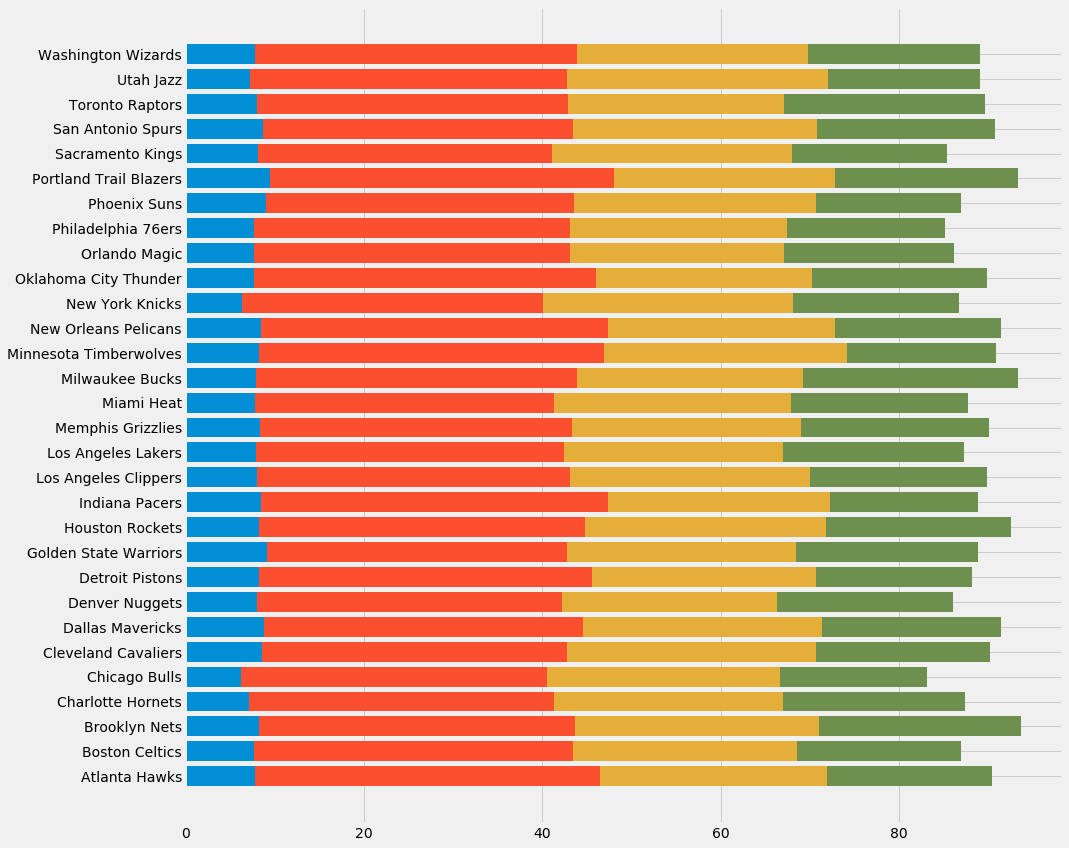

In [234]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.barh(y=very_close_defence.TEAM_NAME, width=very_close_defence.FGA)

ax.barh(y=close_defence.TEAM_NAME, width=close_defence.FGA, left=very_close_defence.FGA)

ax.barh(y=open_defence.TEAM_NAME, width=open_defence.FGA, left=very_close_defence.FGA + close_defence.FGA)

ax.barh(y=wide_open_defence.TEAM_NAME, width=wide_open_defence.FGA, left=very_close_defence.FGA + close_defence.FGA + open_defence.FGA)
